# Exploratory Data Analysis: Used Car Pricing

- Goal: Identify key factors influencing car prices using Python libraries like Pandas, Matplotlib, Seaborn, and SciPy.

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "../python_data/used_car_pricing_data.csv"
df = pd.read_csv(file_path, header=0)

# Data Cleaning: Select only numeric columns for later correlation analysis
df_numeric = df.select_dtypes(include=["number"])

# Encode categorical columns into dummy variables for advanced analysis
df_encoded = pd.get_dummies(df, drop_first=True)

# Force non-numeric values in numeric columns to NaN and drop them
df_numeric = df_numeric.apply(pd.to_numeric, errors="coerce")
df_numeric = df_numeric.dropna()

# Display the first 5 rows of the dataset
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Dataset Overview

The dataset contains information about various attributes of used cars (i.e., `engine size`, `highway MPG`, `body style`, etc.) and their pricing. We'll start by exploring the data structure.

## Exploratory Data Analysis

We'll explore relationships between car attributes and prices using summary statistics, visualizations, and correlation analysis.

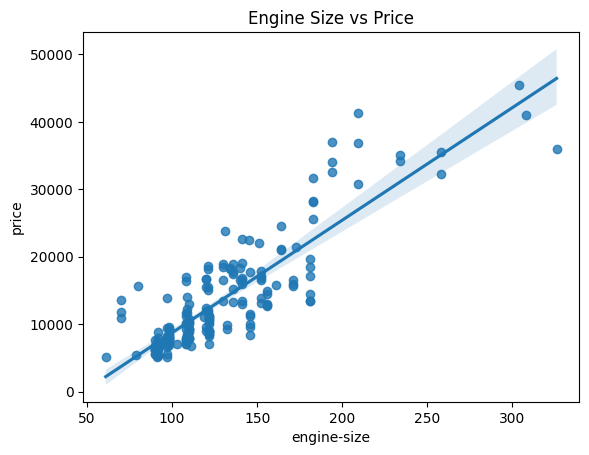

In [10]:
# Correlation analysis
df[['engine-size', 'price']].corr()

# Scatterplot: Engine Size vs Price
sns.regplot(x="engine-size", y="price", data=df)
plt.title("Engine Size vs Price")
plt.show()

### Engine Size vs Price

This scatterplot shows a strong positive correlation between engine size and car price.  
- As `engine size` increases, the `price` of the car tends to increase significantly. The regression line indicates a linear relationship, with most data points closely aligning with the line, suggesting `engine size` is a key factor in determining a car's `price`.  
- Outliers can also be observed, particularly at the higher price range, indicating cars with larger engines that may have additional premium features influencing their price.

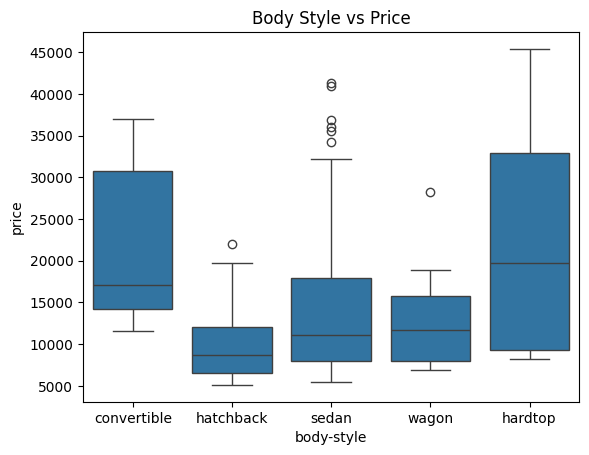

In [4]:
# Boxplot: Body Style vs Price
sns.boxplot(x="body-style", y="price", data=df)
plt.title("Body Style vs Price")
plt.show()

### Body Style vs Price

This boxplot illustrates the variation in car prices across different body styles.  
- Convertibles and hardtops tend to have the highest median prices (likely due to their design and features typically being considered premium).  
- Sedans show a wider price range, with several outliers at the higher end, indicating luxury or premium models within this category. 
- Hatchbacks have the lowest median price, making them more affordable compared to other styles.  
 
Overall, `body style` plays a significant role in pricing, with clear distinctions between budget-friendly and premium categories.

## Statistical Analysis

In this section, we'll calculate summary statistics and analyze categorical variables.

In [5]:
# Summary statistics
df.describe()

# Value counts for 'drive-wheels'
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

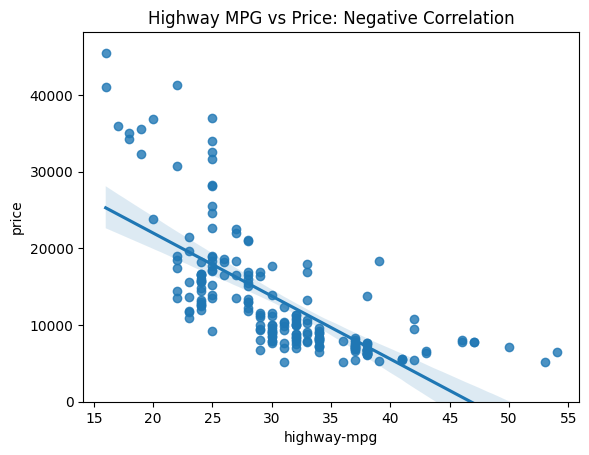

In [3]:
# Negative correlation example: Highway MPG vs Price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title("Highway MPG vs Price: Negative Correlation")
plt.ylim(0,)
plt.show()

**What does this show?** 
- Negative correlation between `highway-mpg` and `price`. 
- Cars with higher `highway MPG` tend to have lower prices. The regression line slopes downward, reflecting this inverse relationship.

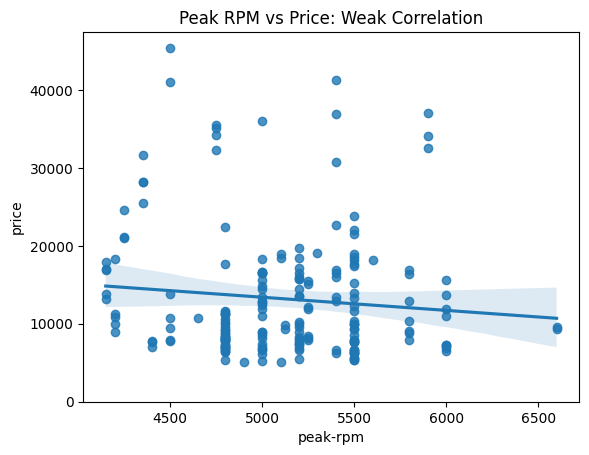

In [4]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.title("Peak RPM vs Price: Weak Correlation")
plt.ylim(0,)
plt.show()

**What does this show?** 
- Highlights a weak or no correlation between `peak-rpm` and `price`. 
- The regression line is almost horizontal, showing minimal impact of `peak-rpm` on car prices.

In [5]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"The Pearson Correlation Coefficient is {pearson_coef:.2f} with a p-value of {p_value:.4f}")

The Pearson Correlation Coefficient is 0.81 with a p-value of 0.0000


## Interpreting the P-Value

P-Value (aka p_value): Tests the statistical significance of the correlation. In this case, we're calculating the strength and statistical significance of the linear relationship between horsepower and price.

As a reminder: A Pearson Coefficient (aka pearson_coef) measures the strength and direction of the correlation, ranging from -1 to 1.
- -1: Perfect negative correlation (as one increases, the other decreases).
- 0: No correlation.
- 1: Perfect positive correlation (as one increases, the other increases).

We have a small p-value (typically seen as < 0.05) indicating the correlation is statistically significant. This means the observed relationship is unlikely to be due to random chance.

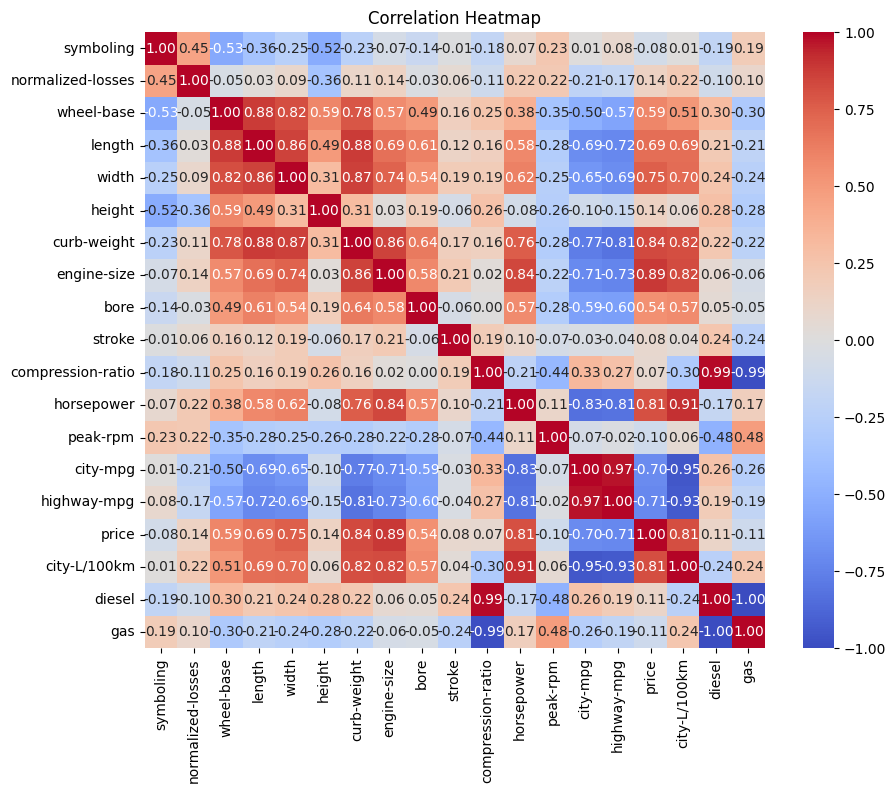

In [21]:
# Creating a correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Why a correlation heatmap? 
- Intuitive way to visually represent the relationships between numerical variables in the dataset.
- Each cell in the heatmap displays the Pearson correlation coefficient, which quantifies the strength and direction of the linear relationship between two variables:

## Insights

High Positive Correlations: 
- Variables like `curb-weight`, `engine-size`, `horsepower`, and `price` are strongly positively correlated. This suggests that heavier, larger-engine, and higher-horsepower vehicles tend to be more expensive.
- `length`, `width`, and `curb-weight` also show strong inter-correlations, indicating that larger vehicles typically have higher weights.

Negative Correlations: 
- `highway-mpg` and `city-mpg` show strong negative correlations with price.
- This reflects the general trend that vehicles with better fuel efficiency are often less expensive.

Weak / No Correlations: Variables like `symboling` and `peak-rpm` have weak or no correlation with price, indicating they might not significantly impact vehicle pricing.

## Use Cases

Feature Selection: The heatmap can help identify key predictors for price (i.e., `horsepower`, `engine-size`) and eliminate weakly correlated variables to simplify modeling.

Multicollinearity Detection: 
- As a reminder, multicollinearity occurs when two or more independent variables in a dataset are highly correlated. This can make it difficult for predictive models (i.e.linear regressions) to determine the true effect of each variable on the target variable.
- For example, `engine-size` and `curb-weight` show strong positive correlations with each other, which could introduce multicollinearity if both are included in the same model.

Hypothesis Testing: The heatmap guides the formulation of hypotheses about relationships in the dataset. For example, the strong positive correlation between `horsepower` and `price` suggests that increasing `horsepower` might significantly increase vehicle's `price`.

## Key Findings

### 1. Engine Size
- Strong positive correlation with price. Vehicles with larger engines tend to be more expensive (as intuition would suggest).
- Evidence: Regression plot (`engine size` vs `price`) and correlation heatmap confirm this strong relationship (with a high correlation coefficient close to +1)
- Important to note: Engine size is strongly correlated with `curb-weight` and `horsepower`, which may introduce multicollinearity in models.
    
### 2. Drive Wheels  
- Rear-wheel drive (RWD) cars tend to have higher prices compared to front-wheel drive (FWD) and four-wheel drive (4WD).  
- Evidence: The above boxplot shows higher median prices for RWD vehicles (which are commonly associated with performance and luxury models). 

### 3. Highway MPG
- Negative correlation with price, indicating that vehicles with better fuel efficiency are typically less expensive.  
- Evidence: The Regression plot (`highway-mpg` vs `price`) shows a negative slope, and the heatmap confirms a strong negative correlation (coefficient close to -1).

### 4. Body Style 
- Sedans and luxury models (i.e., convertibles, hardtops) generally have higher prices compared to hatchbacks and wagons.  
- Evidence: Boxplot highlights higher median prices for luxury body styles. However, the heatmap shows that `body-style` has a weaker correlation with price compared to variables like `engine-size` or `horsepower`.

## In Conclusion
- These findings highlight the key factors influencing vehicle pricing, including strong positive correlations (i.e., `engine size`, `curb weight`) and significant negative correlations (i.e., `highway MPG`). 
- Notably, statistical tests such as the Pearson correlation and corresponding p-values confirm the significance of these relationships (p < 0.05 for most variables).
- This analysis can guide feature selection for predictive modeling and inform pricing strategies in the automotive industry.